Proyecto Nuestras Caras

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Funcion para detectar la cara y recortarla. Usamos la libreria cv2 

In [31]:
def detectar_y_recortar_cara(image_path, output_path, img_size=(30, 30)):
    # Cargar la imagen
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error al cargar la imagen: {image_path}")
        return False
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Cargar el clasificador Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Ajuste de parámetros para mejorar detección
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print(f"No se detectó ninguna cara en {image_path}")
        return False
    
    # Seleccionar la cara más grande (por si hay más de una)
    x, y, w, h = max(faces, key=lambda rect: rect[2] * rect[3])

    # Validar tamaño mínimo de la cara detectada
    if w < 30 or h < 30:
        print(f"Cara demasiado pequeña en {image_path}")
        return False

    # Recortar y redimensionar la cara
    face = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face, img_size)

    # Guardar la imagen procesada
    if not os.path.exists(os.path.dirname(output_path)):
        os.makedirs(os.path.dirname(output_path))
    
    cv2.imwrite(output_path, face_resized)
    print(f"Cara guardada en: {output_path}")
    return True



In [36]:
def detectar_y_recortar_cara_v2(image_path, output_path, sin_caras_path, img_size=(30, 30)):
    # Cargar la imagen
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error al cargar la imagen: {image_path}")
        return False
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Cargar el clasificador Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Ajuste de parámetros para mejorar detección
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print(f"No se detectó ninguna cara en {image_path}")
        
        # Asegurar que la carpeta sin caras exista
        if not os.path.exists(sin_caras_path):
            os.makedirs(sin_caras_path)
        
        # Guardar la imagen sin cara
        no_face_path = os.path.join(sin_caras_path, os.path.basename(image_path))
        cv2.imwrite(no_face_path, img)  # Fixed line
        print(f"Imagen guardada en carpeta sin caras: {no_face_path}")
        return False
    
    # Seleccionar la cara más grande (por si hay más de una)
    x, y, w, h = max(faces, key=lambda rect: rect[2] * rect[3])

    # Validar tamaño mínimo de la cara detectada
    if w < 30 or h < 30:
        print(f"Cara demasiado pequeña en {image_path}")
        return False

    # Recortar y redimensionar la cara
    face = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face, img_size)

    # Guardar la imagen procesada
    if not os.path.exists(os.path.dirname(output_path)):
        os.makedirs(os.path.dirname(output_path))
    
    cv2.imwrite(output_path, face_resized)
    print(f"Cara guardada en: {output_path}")
    return True

In [45]:
import cv2
import os
from typing import Tuple, Optional

def detectar_y_recortar_cara_v3(
    image_path: str,
    output_path: str,
    sin_caras_path: str,
    img_size: Tuple[int, int] = (30, 30),
    scale_factor: float = 1.1,
    min_neighbors: int = 5,
    color: bool = False
) -> Optional[Tuple[int, int, int, int]]:
    """
    Detecta y guarda la cara más grande de una imagen, o guarda la imagen completa si no se detecta ninguna.

    Args:
        image_path: Ruta de la imagen original
        output_path: Ruta donde se guarda la cara recortada
        sin_caras_path: Carpeta donde se guarda la imagen si no se detectan caras
        img_size: Tamaño final de la cara guardada (ancho, alto)
        scale_factor: Parámetro para ajustar el escalado del detector
        min_neighbors: Cantidad mínima de vecinos para validar una detección
        color: Si True, guarda la cara en color; si False, la guarda en escala de grises

    Returns:
        Coordenadas de la cara detectada (x, y, w, h), o None si no se detectó
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"[ERROR] No se pudo cargar la imagen: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbors)

    if len(faces) == 0:
        print(f"[INFO] No se detectó ninguna cara en {image_path}")
        os.makedirs(sin_caras_path, exist_ok=True)
        no_face_path = os.path.join(sin_caras_path, os.path.basename(image_path))
        cv2.imwrite(no_face_path, img)
        print(f"[GUARDADO] Imagen sin cara: {no_face_path}")
        return None

    # Elegir la cara más grande
    x, y, w, h = max(faces, key=lambda rect: rect[2] * rect[3])
    if w < 30 or h < 30:
        print(f"[INFO] Cara demasiado pequeña en {image_path}")
        return None

    # Recortar y redimensionar
    face_crop = img[y:y+h, x:x+w] if color else gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face_crop, img_size)

    # Crear carpeta destino si no existe
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Guardar
    cv2.imwrite(output_path, face_resized)
    print(f"[GUARDADO] Cara guardada en: {output_path}")

    return (x, y, w, h)

In [46]:
# Procesar imágenes en una carpeta
def procesar_carpeta(input_folder, output_folder, sin_caras_folder, img_size=(30, 30)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subdir, _, files in os.walk(input_folder):
        for file in files:
            input_path = os.path.join(subdir, file)
            output_subdir = os.path.join(output_folder, os.path.basename(subdir))

            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            output_path = os.path.join(output_subdir, file)
            detectar_y_recortar_cara_v3(input_path, output_path, sin_caras_folder, img_size)

# Ejecutar
input_folder = '../Eigenfaces/Eigenfaces'
output_folder = '../Eigenfaces/procesadas2'
sin_caras_folder = '../Eigenfaces/sin_caras'

procesar_carpeta(input_folder, output_folder, sin_caras_folder)



[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_20250321_140522457.jpg
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/1742907849966.jpg
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_6807.jpeg
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_4172.JPG
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_4170.JPG
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_7647.JPG
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_4171.JPG
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_20250321_140524420_HDR.jpg
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_8662.jpeg
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_6806.jpeg
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_8661.jpeg
[GUARDADO] Cara guardada en: ../Eigenfaces/procesadas2/Jorgelina/IMG_6805.jpeg
[GUARDADO] Cara guarda

Cargar las imagenes procesadas 

In [35]:
def cargar_imagenes(input_folder, img_size=(30, 30)):
    X = []
    y = []
    label_dict = {}
    label_counter = 0

    # Recorrer las carpetas de imágenes procesadas
    for subdir, _, files in os.walk(input_folder):
        if not files:
            continue
        if subdir not in label_dict:
            label_dict[subdir] = label_counter
            label_counter += 1

        for file in files:
            img_path = os.path.join(subdir, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, img_size)
                X.append(img_resized.flatten())
                y.append(label_dict[subdir])

    print(f"Se cargaron {len(X)} imágenes.")
    return np.array(X), np.array(y)



Script para detectar las caras de captura de zoom

In [41]:
def extract_faces_from_folder(input_folder, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Load Haar Cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, filename)

        # Validate if it's an image
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Skipping non-image file: {filename}")
            continue

        # Read and convert to grayscale
        img = cv2.imread(image_path)
        if img is None:
            print(f"Failed to read image: {filename}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        if len(faces) == 0:
            print(f"No faces detected in {filename}")
            continue
        
        print(f"{len(faces)} face(s) detected in {filename}")

        # Extract and save faces
        for i, (x, y, w, h) in enumerate(faces):
            face = gray[y:y+h, x:x+w]
            face_filename = f"{os.path.splitext(filename)[0]}_face_{i+1}.jpg"
            face_path = os.path.join(output_folder, face_filename)
            cv2.imwrite(face_path, face)
            print(f"Saved face {i+1} from {filename} to {face_path}")

    print("Face extraction completed.")

# Example usage
input_folder = '../Eigenfaces/test/fotos zoom'
output_folder = '../Eigenfaces/test/detectadas'
extract_faces_from_folder(input_folder, output_folder)

15 face(s) detected in Captura desde 2025-03-15 09-40-47.png
Saved face 1 from Captura desde 2025-03-15 09-40-47.png to ../Eigenfaces/test/detectadas/Captura desde 2025-03-15 09-40-47_face_1.jpg
Saved face 2 from Captura desde 2025-03-15 09-40-47.png to ../Eigenfaces/test/detectadas/Captura desde 2025-03-15 09-40-47_face_2.jpg
Saved face 3 from Captura desde 2025-03-15 09-40-47.png to ../Eigenfaces/test/detectadas/Captura desde 2025-03-15 09-40-47_face_3.jpg
Saved face 4 from Captura desde 2025-03-15 09-40-47.png to ../Eigenfaces/test/detectadas/Captura desde 2025-03-15 09-40-47_face_4.jpg
Saved face 5 from Captura desde 2025-03-15 09-40-47.png to ../Eigenfaces/test/detectadas/Captura desde 2025-03-15 09-40-47_face_5.jpg
Saved face 6 from Captura desde 2025-03-15 09-40-47.png to ../Eigenfaces/test/detectadas/Captura desde 2025-03-15 09-40-47_face_6.jpg
Saved face 7 from Captura desde 2025-03-15 09-40-47.png to ../Eigenfaces/test/detectadas/Captura desde 2025-03-15 09-40-47_face_7.jpg
S

In [ ]:
# Cargar imágenes procesadas
input_folder = '../Eigenfaces/procesadas2'
X, y = cargar_imagenes(input_folder)

# Estandarizar las imágenes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.90)  # Mantener el 90% de la varianza
X_pca = pca.fit_transform(X_scaled)

print(f"Dimensiones originales: {X.shape[1]}")
print(f"Dimensiones después de PCA: {X_pca.shape[1]}")



Se cargaron 293 imágenes.
Dimensiones originales: 900
Dimensiones después de PCA: 96


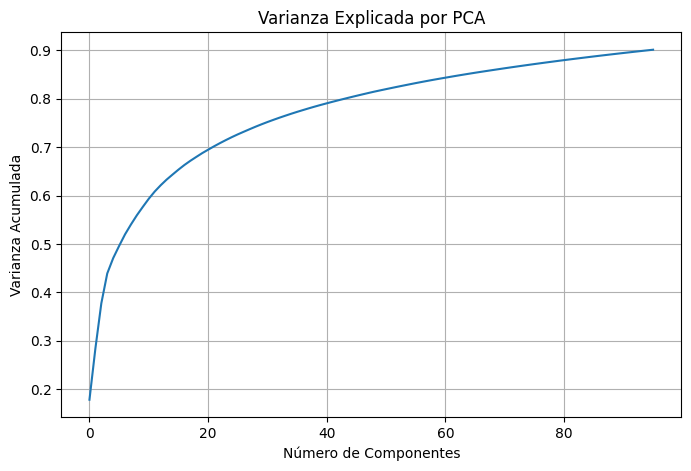

In [43]:
# Visualizar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.title('Varianza Explicada por PCA')
plt.show()



Cara promedio

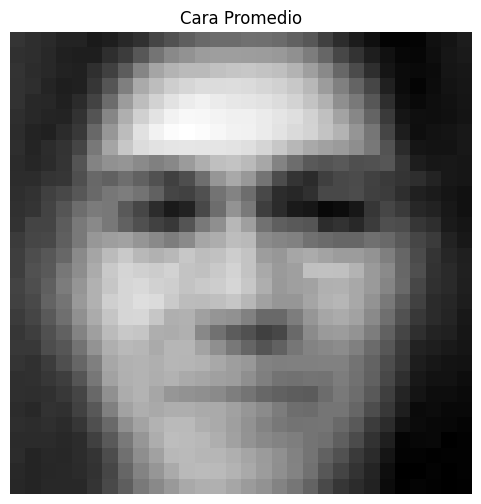

In [44]:
mean_face = np.mean(X, axis=0)

# Convertir a imagen 2D
mean_face_image = mean_face.reshape(30, 30)

# Visualizar la cara promedio
plt.figure(figsize=(6, 6))
plt.imshow(mean_face_image, cmap='gray')
plt.title("Cara Promedio")
plt.axis('off')
plt.show()

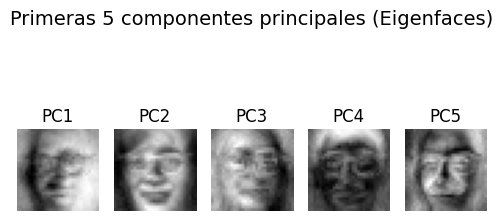

In [12]:
k = 5  # Número de componentes principales a visualizar
fig, axs = plt.subplots(1, k, figsize=(5, 3))
fig.suptitle(f"Primeras {k} componentes principales (Eigenfaces)", fontsize=14)
for i in range(k):
    eigenface = pca.components_[i].reshape(30, 30)
    axs[i].imshow(eigenface, cmap='gray')
    axs[i].set_title(f"PC{i+1}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Otra forma 

In [ ]:
def cargar_imagenes(directorio):
    """
    Carga imágenes de un directorio, conviertiéndolas a escala de grises y redimensionándolas.
    
    Parámetros:
    - directorio: Ruta al directorio con las imágenes de entrenamiento
    
    Retorna:
    - imagenes: Lista de imágenes procesadas
    - etiquetas: Lista de etiquetas correspondientes
    - nombres: Lista de nombres de personas
    """
    imagenes = []
    etiquetas = []
    nombres = []
    
    # Iterar sobre subdirectorios (cada subdirectorio representa una persona)
    for nombre in os.listdir(directorio):
        ruta_persona = os.path.join(directorio, nombre)
        
        # Verificar que sea un directorio
        if os.path.isdir(ruta_persona):
            for archivo in os.listdir(ruta_persona):
                ruta_imagen = os.path.join(ruta_persona, archivo)
                
                # Cargar imagen
                img = cv2.imread(ruta_imagen)
                if img is not None:
                    # Convertir a escala de grises
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    # Redimensionar
                    gray_resized = cv2.resize(gray, (64, 64))
                    
                    imagenes.append(gray_resized)
                    etiquetas.append(len(nombres))
            
            nombres.append(nombre)
    
    return np.array(imagenes), np.array(etiquetas), nombres